In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import FloatSlider, interact
from scipy.stats import multivariate_normal as mvn

In [2]:
%matplotlib inline

In [3]:
xy = np.mgrid[-5:5.1:0.1, -5:5.1:0.1]
shape = xy.shape
xy = xy.reshape(2,-1).T

In [4]:
def gmean(alpha):
    sigma = (1-alpha) * sigma1 + alpha * sigma2
    g = mvn(mean=mu, cov=sigma)
    return g

def draw_mean(alpha=0.5):
    g = gmean(alpha)
    pdf = g.pdf(xy).reshape(shape[1:])
    plt.imshow(pdf, extent=[-5,5,-5,5], origin='lower')

In [5]:
mu = np.array([0,0])

In [6]:
sigma1 = np.array([[2, 1],
                   [1, 2]])
g1 = mvn(mean=mu, cov=sigma1)

In [7]:
sigma2 = np.array([[1, -1],
                   [-1, 4]])
g2 = mvn(mean=mu, cov=sigma2)

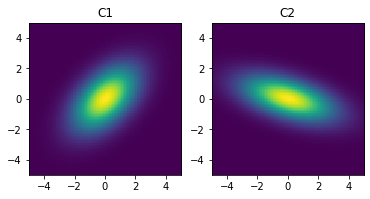

interactive(children=(FloatSlider(value=0.5, description='alpha', max=1.0), Output()), _dom_classes=('widget-i…

In [10]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(g1.pdf(xy).reshape(shape[1:]), extent=[-5,5,-5,5], origin='lower')
ax[0].set_title('C1')
ax[1].imshow(g2.pdf(xy).reshape(shape[1:]), extent=[-5,5,-5,5], origin='lower')
ax[1].set_title('C2');
interact(draw_mean, alpha=FloatSlider(min=0,max=1,step=0.1,value=0.5));